# Titanic Survival

### NOTES

No todas las tablas se usaran para el modelo de ML ya que algunas columnas solo contienen valores categoricos/informativos o columnas que contienen una gran cantidad de valores NULL.

Para el modelo se dropearan inicialmente las tablas de:
* PassengerId 
* Name
* Ticket
* Fare
* Cabin
* Embarked 

Y se usaran inicialmente las tablas de:
* Sex
* Age

In [9]:
import pandas as pd 
import numpy as np
import seaborn as sns
import math

sns.set_theme(style="darkgrid")
df = pd.read_csv("train.csv")
display(df)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## Quick Data Count

Total of passengers:  891
Total of male passengers:  577
Total of female passengers:  314


<AxesSubplot:xlabel='Sex', ylabel='count'>

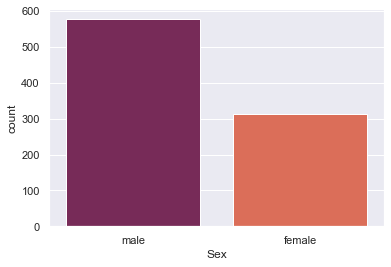

In [10]:
totalPassengers = len(df)
totalM = df['Sex'].tolist().count('male')
totalF = df['Sex'].tolist().count('female')
print("Total of passengers: ", totalPassengers)
print("Total of male passengers: ", totalM)
print("Total of female passengers: ", totalF)

sns.countplot(x='Sex', data=df, palette='rocket')


## Survivors

Total survivors:  342
Total of male survivors:  109
Total of female survivors:  233
Total of male non survivors:  468
Total of female non survivors:  81


<AxesSubplot:xlabel='Survived', ylabel='count'>

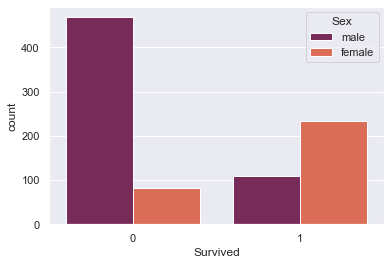

In [11]:
totalM1 = len(df[(df['Sex'] == 'male') & (df['Survived'] == 1)])
totalF1 = len(df[(df['Sex'] == 'female') & (df['Survived'] == 1)])
totalM0 = len(df[(df['Sex'] == 'male') & (df['Survived'] == 0)])
totalF0 = len(df[(df['Sex'] == 'female') & (df['Survived'] == 0)])
print("Total survivors: ", totalM1 + totalF1)
print("Total of male survivors: ", totalM1)
print("Total of female survivors: ", totalF1)
print("Total of male non survivors: ", totalM0)
print("Total of female non survivors: ", totalF0)

sns.countplot(x='Survived', data=df, hue='Sex', palette='rocket')

## Checking for blank values

In [12]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
maleBlanks1 = len(df[(df['Sex'] == 'male') & (df['Survived'] == 1) & (df.Age.isnull())])
femaleBlanks1 = len(df[(df['Sex'] == 'female') & (df['Survived'] == 1) & (df.Age.isnull())])
maleBlanks0 = len(df[(df['Sex'] == 'male') & (df['Survived'] == 0) & (df.Age.isnull())])
femaleBlanks0 = len(df[(df['Sex'] == 'female') & (df['Survived'] == 0) & (df.Age.isnull())])

print("Male survivors age blanks: ", maleBlanks1)
print("Female survivors age blanks: ", femaleBlanks1)
print("Male non survivors age blanks: ", maleBlanks0)
print("Female non survivors age blanks: ", femaleBlanks0)

Male survivors age blanks:  16
Female survivors age blanks:  36
Male non survivors age blanks:  108
Female non survivors age blanks:  17


In [14]:
pd.DataFrame(data = [df.isna().sum() / df.shape[0] * 100], index = ["Blanks %"])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Blanks %,0.0,0.0,0.0,0.0,0.0,19.86532,0.0,0.0,0.0,0.0,77.104377,0.224467


## Survivors per age

In [15]:
totalMSKid = len(df[(df['Sex'] == 'male') & (df['Survived'] == 1) & (df['Age'] <= 10)])
totalMSTeen = len(df[(df['Sex'] == 'male') & (df['Survived'] == 1) & (df['Age'] > 10 ) & (df['Age'] <= 20 )])
totalMSAdult = len(df[(df['Sex'] == 'male') & (df['Survived'] == 1) & (df['Age'] > 20)])
print("Total of kid male survivors: ", totalMSKid)
print("Total of teen male survivors: ", totalMSTeen)
print("Total of adult male survivors: ", totalMSAdult)
print(totalMSKid+totalMSTeen+totalMSAdult)
print()

totalFSKid = len(df[(df['Sex'] == 'female') & (df['Survived'] == 1) & (df['Age'] <= 10)])
totalFSTeen = len(df[(df['Sex'] == 'female') & (df['Survived'] == 1) & (df['Age'] > 10 ) & (df['Age'] <= 20)])
totalFSAdult = len(df[(df['Sex'] == 'female') & (df['Survived'] == 1) & (df['Age'] > 20)])
print("Total of kid female survivors: ", totalFSKid)
print("Total of teen female survivors: ", totalFSTeen)
print("Total of adult female survivors: ", totalFSAdult)
print(totalFSKid+totalFSTeen+totalFSAdult)

#display(df.groupby("Age")["Survived"].mean())

Total of kid male survivors:  19
Total of teen male survivors:  10
Total of adult male survivors:  64
93

Total of kid female survivors:  19
Total of teen female survivors:  34
Total of adult female survivors:  144
197


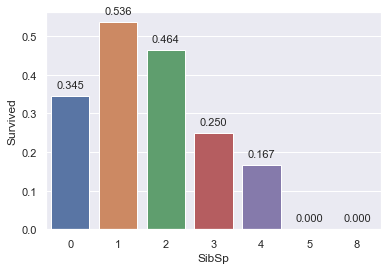

In [36]:
for i, var in enumerate(["SibSp"]):
    surv = sns.barplot(data=df, x=var, y='Survived', ci=None)
    for bar in surv.patches:
        surv.annotate(format("{:.3f}".format(bar.get_height())),
            (bar.get_x() + bar.get_width() / 2,
            bar.get_height()),
            ha='center',
            size=11, 
            xytext=(0, 8), 
            textcoords='offset points')

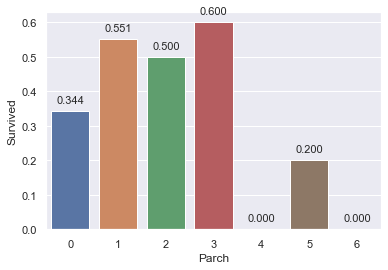

In [37]:
for i, var in enumerate(["Parch"]):
    surv = sns.barplot(data=df, x=var, y='Survived', ci=None)
    for bar in surv.patches:
        surv.annotate(format("{:.3f}".format(bar.get_height())),
            (bar.get_x() + bar.get_width() / 2,
            bar.get_height()),
            ha='center',
            size=11, 
            xytext=(0, 8), 
            textcoords='offset points')

# Training Model

In [18]:
filtered_df = df[df['Age'].notnull()]
x_train = filtered_df['Age']
y_train = filtered_df['Survived']

theta = [0, 1]
iters = 10000
alpha = 0.0001
n = len(y_train)

print(len(x_train))
print(len(y_train))

h = lambda x, theta: 1/(1 + math.exp(-(theta[0] + theta[1] * x)))
j_i = lambda x ,y, theta: y * math.log(h(x, theta)) + (1 - y) * math.log(1 - h(x, theta))

for i in range(iters):
    acumDelta = []
    acumDeltaX = []
    for x_i, y_i in zip(x_train, y_train):
        acumDelta.append(h(x_i, theta) - y_i)
        acumDeltaX.append((h(x_i, theta) - y_i) * x_i)
    
    sJ0 = sum(acumDelta)
    sJ1 = sum(acumDeltaX)
    theta[0] = theta[0] - alpha/n*sJ0
    theta[1] = theta[1] - alpha/n*sJ1
    
print(theta)

714
714
[-0.03279672947067068, -0.011623514116567696]


In [20]:
#Test data set
test_df = pd.read_csv("test.csv")
display(test_df)

filtered_tdf = test_df[df['Age'].notnull()]
x_validate = filtered_tdf['Age']


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


C:\Users\Ricardo Arriaga\AppData\Local\Temp\ipykernel_26428\2410176737.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_tdf = test_df[df['Age'].notnull()]


KeyError: 'Survived'

In [ ]:
n_train = len(y_train)
n_validate = len(y_validate)

# Validación
acumDelta = []
for x_i, y_i in zip(x_validate, y_validate):
  acumDelta.append(j_i(x_i,y_i,theta))  

sDelta = sum(acumDelta)  
J_validate = 1/(2*n_validate)*sDelta

# Training
acumDelta = []
for x_i, y_i in zip(x_train,y_train):
  acumDelta.append(j_i(x_i,y_i,theta))  

sDelta = sum(acumDelta)  
J_train = 1/(2*n_train)*sDelta

print(J_validate)
print(J_train)
print(theta)

     PassengerId  Survived  Pclass                            Name   Sex  \
0              1         0       3         Braund, Mr. Owen Harris  male   
4              5         0       3        Allen, Mr. William Henry  male   
5              6         0       3                Moran, Mr. James  male   
6              7         0       1         McCarthy, Mr. Timothy J  male   
7              8         0       3  Palsson, Master. Gosta Leonard  male   
..           ...       ...     ...                             ...   ...   
883          884         0       2   Banfield, Mr. Frederick James  male   
884          885         0       3          Sutehall, Mr. Henry Jr  male   
886          887         0       2           Montvila, Rev. Juozas  male   
889          890         1       1           Behr, Mr. Karl Howell  male   
890          891         0       3             Dooley, Mr. Patrick  male   

      Age  SibSp  Parch            Ticket     Fare Cabin Embarked  
0    22.0      1   

<AxesSubplot:xlabel='Age', ylabel='Survived'>

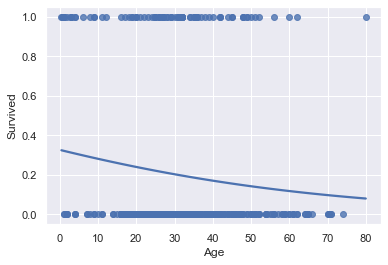

In [17]:
# Male
male = df[(df['Sex'] == 'male')]
print(male)
x = male['Age']
y = male['Survived']

sns.regplot(x=x, y=y, data=male, logistic=True, ci=None)